# Fit ARIMA in the residuals

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time
import csv

import pandas as pd
import matplotlib.pyplot as plt
import pickle
import datetime

In [2]:
df1 = pd.read_csv('/network/tmp1/barinpvi/data/preprocessed_canopex_envcan/100.csv')

df1['date'] = pd.to_datetime(df1['date'])
df1.index = df1['date']

In [3]:
monthly = df1.resample("M", how='mean')

discharge = monthly['discharge'].fillna(method='bfill')

/network/home/barinpvi/.conda/envs/geo/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  """Entry point for launching an IPython kernel.


In [4]:
import statsmodels.api as sm
from pylab import rcParams

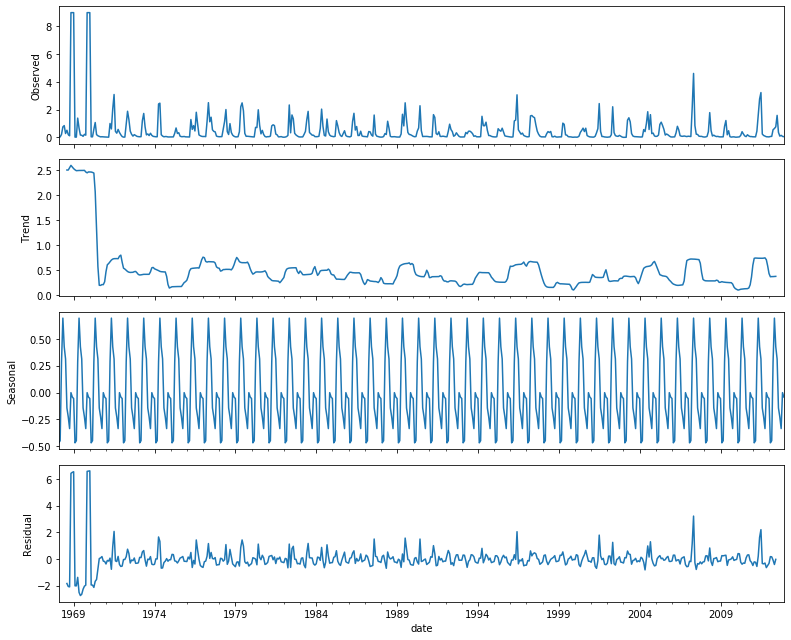

In [5]:
rcParams['figure.figsize'] = 11, 9
decomposed = sm.tsa.seasonal_decompose(discharge,freq=12) # monthly frequency
figure = decomposed.plot()
plt.show()

In [8]:
rcParams['figure.figsize'] = 5, 5

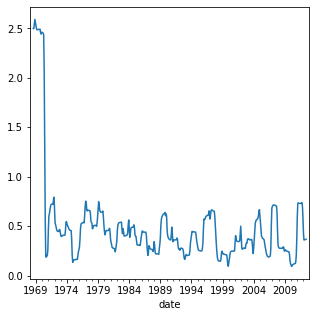

In [9]:
decomposed.trend.plot()

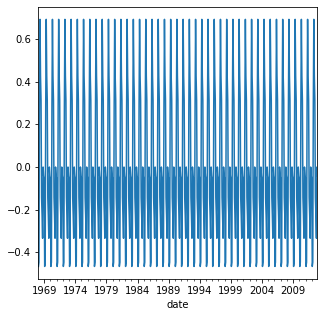

In [12]:
decomposed.seasonal.plot()

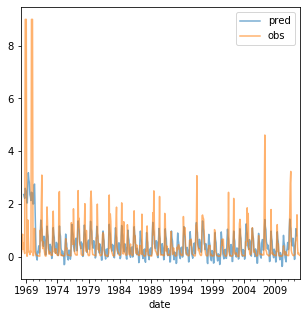

In [20]:
(decomposed.trend + decomposed.seasonal).plot(alpha=0.6, label='pred')
discharge.plot(alpha=0.6, label='obs')
plt.legend()

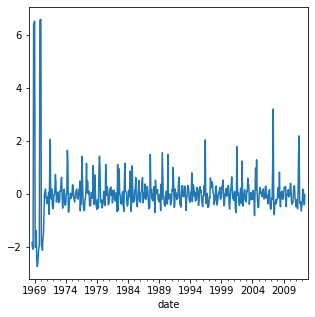

In [25]:
decomposed.resid.plot()

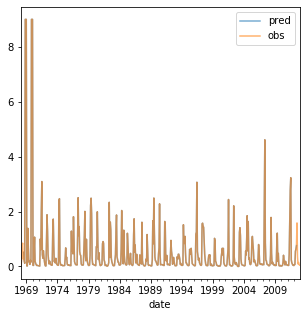

In [26]:
(decomposed.trend + decomposed.seasonal + decomposed.resid).plot(alpha=0.6, label='pred')
discharge.plot(alpha=0.6, label='obs')
plt.legend()

In [28]:
from pmdarima.arima import auto_arima

/network/home/barinpvi/.conda/envs/geo/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/network/home/barinpvi/.conda/envs/geo/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [45]:
res = decomposed.resid.fillna(method='bfill')

In [52]:
res = res.fillna(method='ffill')

In [53]:
m2 = auto_arima(res, error_action='ignore', seasonal=True, trace=True)

/network/home/barinpvi/.conda/envs/geo/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(2, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=1070.636, BIC=1096.374, Fit time=0.890 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=1447.542, BIC=1456.121, Fit time=0.104 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(0, 0, 0, 1); AIC=1300.535, BIC=1313.404, Fit time=0.090 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=1316.021, BIC=1328.891, Fit time=0.118 seconds
Fit ARIMA: order=(1, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=1246.413, BIC=1267.862, Fit time=0.295 seconds


/network/home/barinpvi/.conda/envs/geo/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/network/home/barinpvi/.conda/envs/geo/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/network/home/barinpvi/.conda/envs/geo/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/network/home/barinpvi/.conda/envs/geo/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationa

Fit ARIMA: order=(3, 0, 2) seasonal_order=(0, 0, 0, 1); AIC=1096.022, BIC=1126.050, Fit time=1.007 seconds


/network/home/barinpvi/.conda/envs/geo/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/network/home/barinpvi/.conda/envs/geo/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/network/home/barinpvi/.conda/envs/geo/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: order=(2, 0, 1) seasonal_order=(0, 0, 0, 1); AIC=1111.013, BIC=1132.462, Fit time=0.842 seconds


/network/home/barinpvi/.conda/envs/geo/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/network/home/barinpvi/.conda/envs/geo/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: order=(2, 0, 3) seasonal_order=(0, 0, 0, 1); AIC=1062.470, BIC=1092.498, Fit time=1.073 seconds


/network/home/barinpvi/.conda/envs/geo/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/network/home/barinpvi/.conda/envs/geo/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: order=(3, 0, 4) seasonal_order=(0, 0, 0, 1); AIC=1050.331, BIC=1088.938, Fit time=1.178 seconds
Fit ARIMA: order=(2, 0, 4) seasonal_order=(0, 0, 0, 1); AIC=1134.154, BIC=1168.472, Fit time=0.914 seconds


/network/home/barinpvi/.conda/envs/geo/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/network/home/barinpvi/.conda/envs/geo/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/network/home/barinpvi/.conda/envs/geo/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/network/home/barinpvi/.conda/envs/geo/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting 

Fit ARIMA: order=(4, 0, 4) seasonal_order=(0, 0, 0, 1); AIC=1053.648, BIC=1096.545, Fit time=1.474 seconds


/network/home/barinpvi/.conda/envs/geo/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/network/home/barinpvi/.conda/envs/geo/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: order=(3, 0, 3) seasonal_order=(0, 0, 0, 1); AIC=1076.278, BIC=1110.595, Fit time=1.047 seconds


/network/home/barinpvi/.conda/envs/geo/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/network/home/barinpvi/.conda/envs/geo/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA: order=(3, 0, 5) seasonal_order=(0, 0, 0, 1); AIC=1115.624, BIC=1158.521, Fit time=1.248 seconds
Fit ARIMA: order=(4, 0, 5) seasonal_order=(0, 0, 0, 1); AIC=1097.133, BIC=1144.320, Fit time=1.294 seconds
Total fit time: 11.582 seconds


/network/home/barinpvi/.conda/envs/geo/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [54]:
len(res)

539

In [60]:
res_forecast = m2.predict(n_periods=539)

Text(0.5, 1.0, 'Residuals')

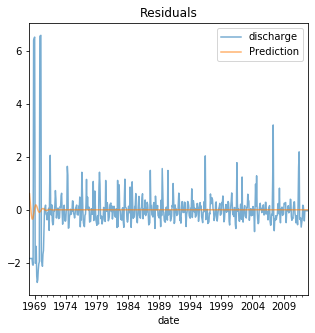

In [63]:
future_forecast = pd.DataFrame(res_forecast, index = res.index, columns=['Prediction'])
pd.concat([res, future_forecast], axis=1).plot(alpha=0.6)
plt.title("Residuals")

Text(0.5, 1.0, 'Discharge forecast')

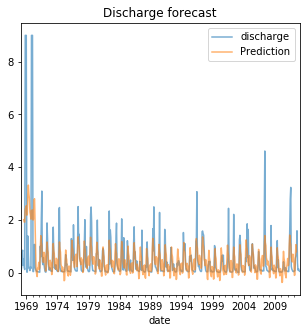

In [74]:
future_forecast = pd.DataFrame((res_forecast + decomposed.trend.values + decomposed.seasonal.values), index = res.index, columns=['Prediction'])
pd.concat([discharge, future_forecast], axis=1).plot(alpha=0.6)
plt.title("Discharge forecast")